<a href="https://colab.research.google.com/github/PerfectMach1ne/machine-learning-data-science/blob/main/fcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing data

---



Based on https://www.youtube.com/watch?v=i_LwzRVP7bg and a little bit of https://bebi103a.github.io/lessons/00/setting_up_your_computer.html#Setting-up-Google-Colab (basically everything in this repo is going to be done based off of those 2 sources.)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols) # df = dataframe
df.head() # "gimme the first 5 things"

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

'g' stands for gammas and 'h' for hadrons.

In [6]:
df["class"] = (df["class"] == 'g').astype(int) # Since we have binary data, we can convert class data representing either
# gammas or hadrons to True and False and then subsequently convert this boolean data to 1s and 0s.

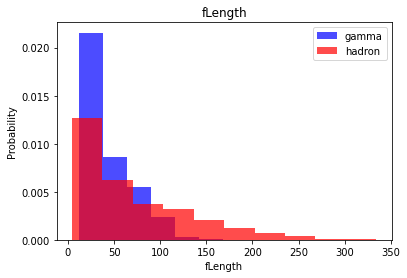

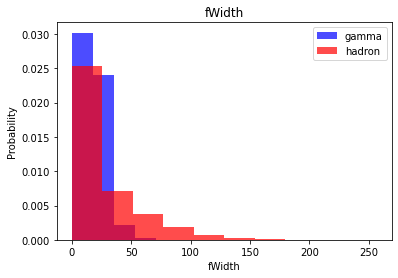

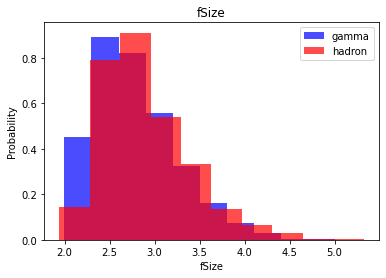

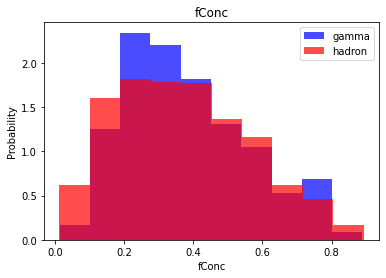

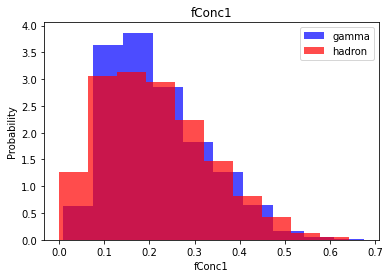

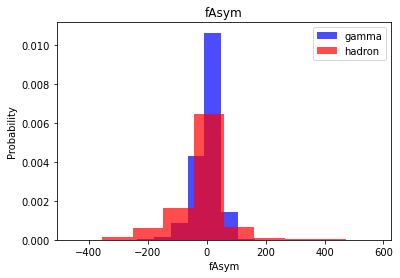

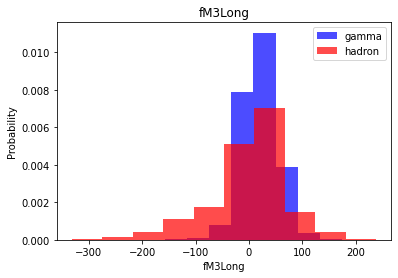

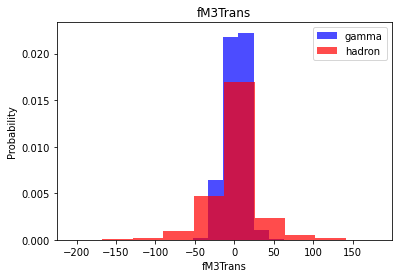

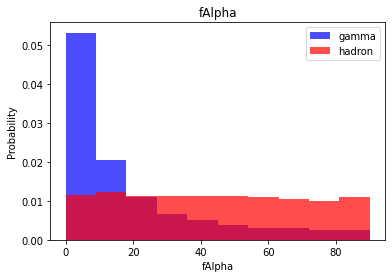

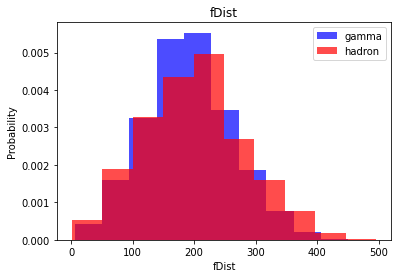

In [ ]:
for label in cols[:-1]: # list everything up till the last thing
  plt.hist(df[df["class"] == 1][label], # "inside the dataframe, get me everything where the class is == 1" and then add info about the label ig
           color='blue', label='gamma', alpha=0.7, # this alpha thing is for transparency
           density=True) # gammas
  plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True) # hadrons
  # density=True normalizes the distributions; distributing over how many samples there are
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [12]:
# Train, validation and test datasets
# df.sample(frac=1) shuffles the data
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))] # everything between 60-80% will go tow. validation
                              # and subsequently: 0-60% to train, 80-100% to test
                              )

Scaling numbers to make them relative to the mean & standard deviation of a specific column (I thing?)

In [13]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values # dataframe columns to the last item
  y = dataframe[dataframe.columns[-1]].values # THE last column

  scaler = StandardScaler()
  X = scaler.fit_transform(X) # take x and fit the standard scaler to x, then transform all the values to what they'd be and get a new x

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1)))) # take 2 arrays and horizontally stack them together (put em side by side, not on top of each other)
  # we need to reshape y to a 2D array; -1 means infer what the dimension value would be (like writing len(y) )

  return data, X, y

In [14]:
# WHEN YOU GET AttributeError about some 'columns', rerun the dataset split code to "reset" train and other arrays
train, X_train, y_train = scale_dataset(train, oversample=True)
# print(len(train[train["class"] == 1])) # gammas
# print(len(train[train["class"] == 0])) # hadrons
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

14866
7433
7433


The inconsistent amount of data could cause issues. We need to "oversample" the training data set - increase the number of hadron values to match the gamma value set better.

# k-Nearest Neighbours algorithm (kNN)

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5) # Amount of k neighbors
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred # y predictions

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
y_test # truth values

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1293
           1       0.84      0.88      0.86      2511

    accuracy                           0.81      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.81      0.81      3804



Precision for classes 0 & 1 respectively (hadrons & gammas): 75% and 84%
Precision = how many are actually the class labeled by the model.
Recall = how many true positives did we get from the "set of all truth" (my wording, please get it future me)
f1-score = combined precision & recall

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1293
           1       0.86      0.87      0.86      2511

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

---



The Bayes Rule:
\begin{equation*}
P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B)}
\end{equation*}
And the Naive Bayes algorithm version:
\begin{equation*}
P(C_{k}|x)=\frac{P(x|C_{k})\cdot C_{k}}{P(x)}
\end{equation*}
A rule for Naive Bayes:
\begin{equation*}
P(C_{k}|x_{1},x_{2},...,x_{n}) \propto p(C_{k}) \prod_{i=1}^{n}p(x_{i}|C_{k})
\end{equation*}
\begin{equation*}
P(C_{k}|x_{1},x_{2},...,x_{n}) = \frac{P(x_{1},x_{2},...,x_{n}|C_{k})\cdot P(C_{k})}{P(x_{1},x_{2},...,x_{n})}
\end{equation*}
\begin{equation*}
P(C_{k},x_{1},x_{2},...,x_{n}) \propto P(x_{1},x_{2},...,x_{n}|C_{k}) \cdot P(C_{k})
\end{equation*}
\begin{equation*}
P(x_{1},x_{2},...,x_{n}|C_{k}) = P(x_{1}|C_{k})\cdot  P(x_{2}|C_{k})\cdot ... \cdot P(x_{n}|C_{k})
\end{equation*}
\begin{equation*}
P(C_{k},x_{1},x_{2},...,x_{n}) \propto p(C_{k}) \prod_{i=1}^{n}p(x_{i}|C_{k})
\end{equation*}
So: probability that we're in some category Ck given that we have all these different features x is proportional to the probability of that class in general to probability of each of these features given that we're in this 1 class that we're testing.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1293
           1       0.75      0.90      0.82      2511

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression (Log Regression)

---

Not going to rewrite the derivation from my physical notebook, so here's a ready-formula lol:
\begin{equation*}
p=\frac{1}{1+e^{-(mx+b)}}=S(mx+b)
\end{equation*}

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1293
           1       0.85      0.82      0.84      2511

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM - Support Vector Machines

---



In [ ]:
from sklearn.svm import SVC # Support Vector Classifier

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1293
           1       0.90      0.89      0.90      2511

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Net & Tensorflow

---



In [1]:
import tensorflow as tf

In [24]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  
  plt.show()

In [25]:
def train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),  # dense layer, 32 units, using RELU activation function
      tf.keras.layers.Dropout(dropout_prob), # helps prevent overfitting - select random nodes & don't train them
      tf.keras.layers.Dense(num_nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation="sigmoid")
  ]) # groups a linear stack of layers into a model

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0 # verbose removes cool progress text. prefereable if text has 28429489242 lines, though.
  )

  return nn_model, history

In [27]:
from tqdm import tqdm # POGress bar


  0%|          | 0/3 [00:00<?, ?it/s]


16 nodes, dropout 0, learning rate 0.01, batch size 32


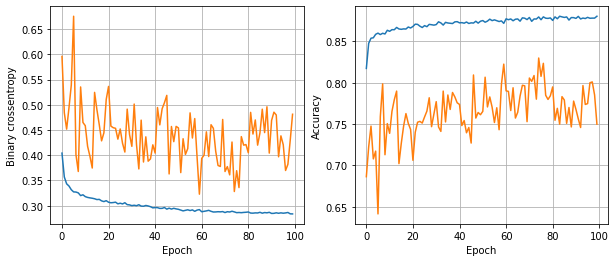

119/119 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8743

16 nodes, dropout 0, learning rate 0.01, batch size 64


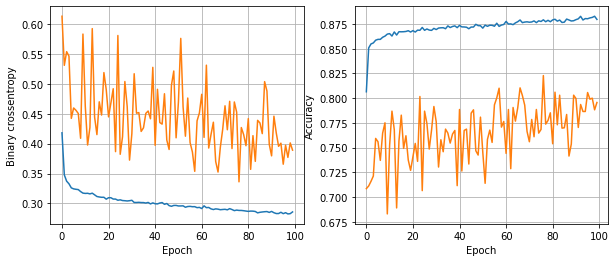

119/119 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8759

16 nodes, dropout 0, learning rate 0.01, batch size 128


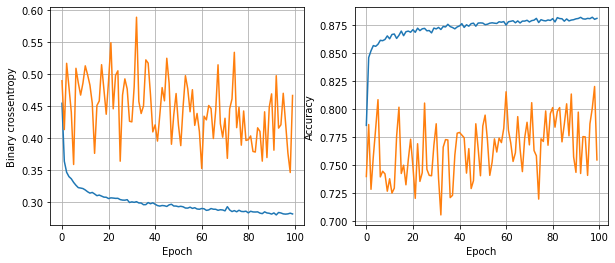

119/119 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8662

16 nodes, dropout 0, learning rate 0.005, batch size 32


Exception ignored in: <function tqdm.__del__ at 0x7f638b7fb940>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 1162, in __del__
    self.close()
  File "/usr/local/lib/python3.8/dist-packages/tqdm/std.py", line 1291, in close
    if self.last_print_t < self.start_t + self.delay:
AttributeError: 'tqdm' object has no attribute 'last_print_t'


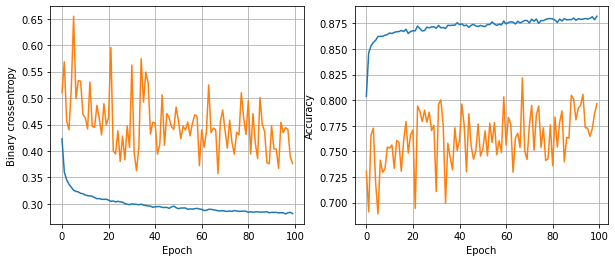

119/119 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8641

16 nodes, dropout 0, learning rate 0.005, batch size 64


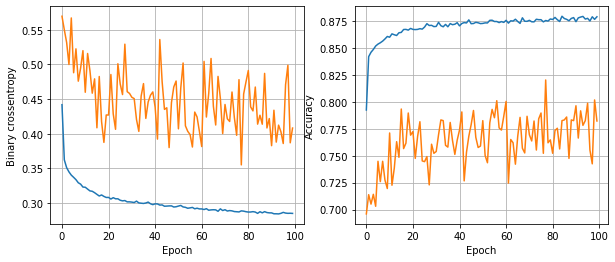

119/119 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8730

16 nodes, dropout 0, learning rate 0.005, batch size 128


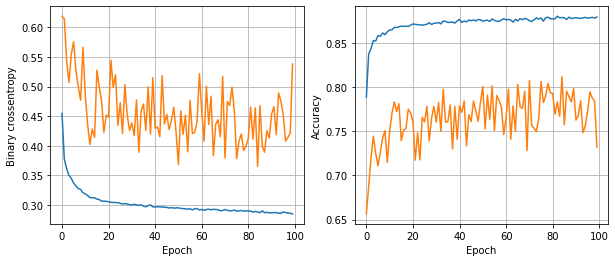

119/119 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8770

16 nodes, dropout 0, learning rate 0.001, batch size 32


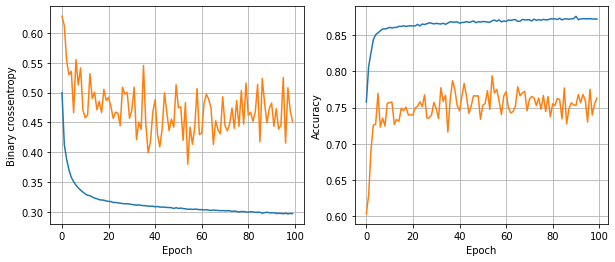

119/119 [==============================] - 0s 3ms/step - loss: 0.3009 - accuracy: 0.8738

16 nodes, dropout 0, learning rate 0.001, batch size 64


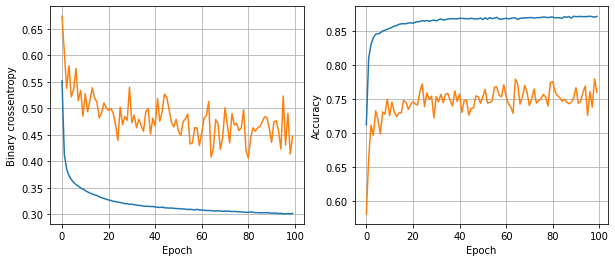

119/119 [==============================] - 0s 2ms/step - loss: 0.2993 - accuracy: 0.8743

16 nodes, dropout 0, learning rate 0.001, batch size 128


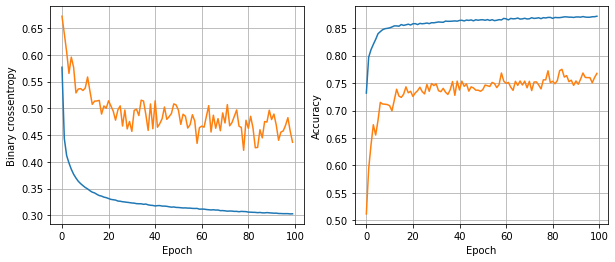

119/119 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8749

16 nodes, dropout 0.2, learning rate 0.01, batch size 32


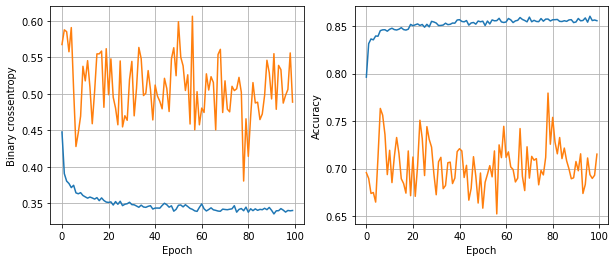

119/119 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8686

16 nodes, dropout 0.2, learning rate 0.01, batch size 64


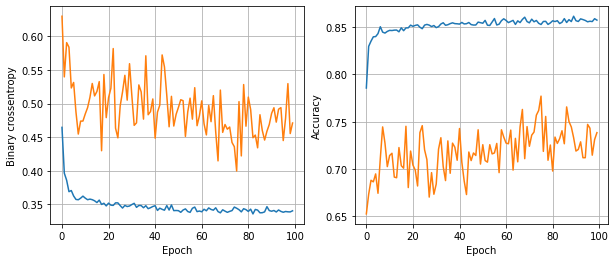

119/119 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.8728

16 nodes, dropout 0.2, learning rate 0.01, batch size 128


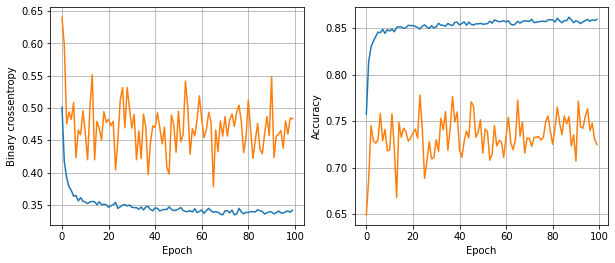

119/119 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8725

16 nodes, dropout 0.2, learning rate 0.005, batch size 32


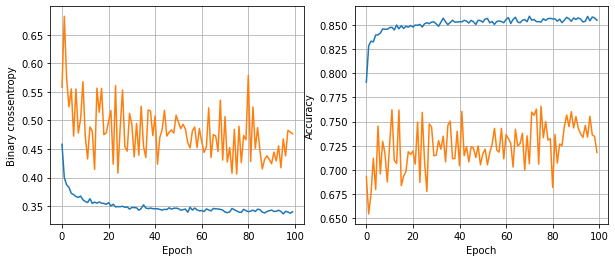

119/119 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8693

16 nodes, dropout 0.2, learning rate 0.005, batch size 64


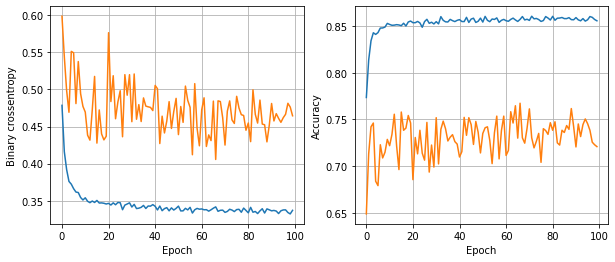

119/119 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8683

16 nodes, dropout 0.2, learning rate 0.005, batch size 128


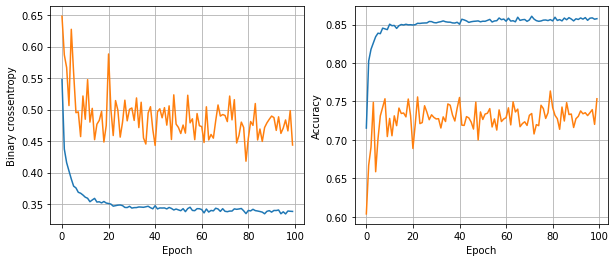

119/119 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8720

16 nodes, dropout 0.2, learning rate 0.001, batch size 32


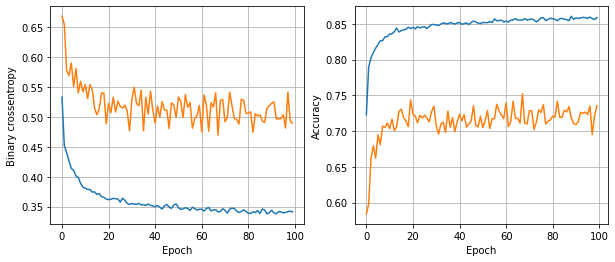

119/119 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8672

16 nodes, dropout 0.2, learning rate 0.001, batch size 64


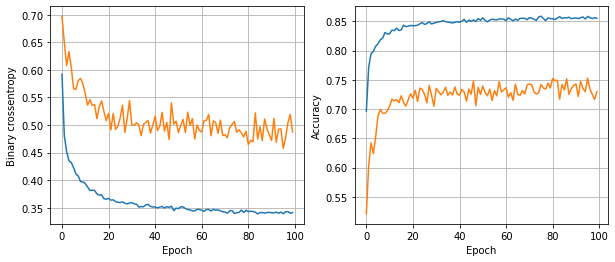

119/119 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8704

16 nodes, dropout 0.2, learning rate 0.001, batch size 128


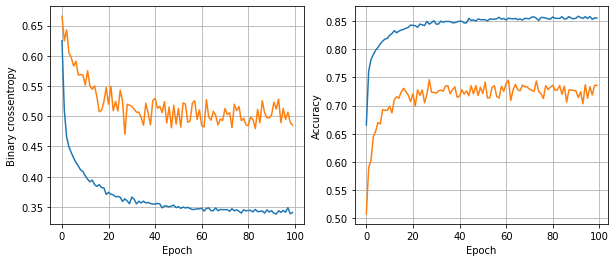

119/119 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8733



 33%|███▎      | 1/3 [19:55<39:50, 1195.16s/it]


32 nodes, dropout 0, learning rate 0.01, batch size 32


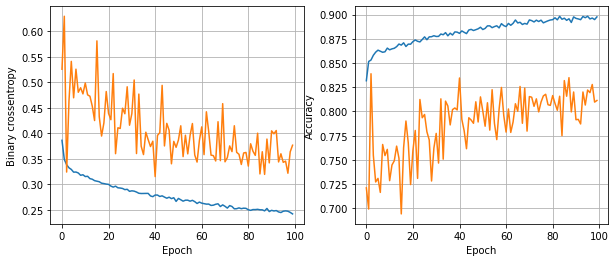

119/119 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8717

32 nodes, dropout 0, learning rate 0.01, batch size 64


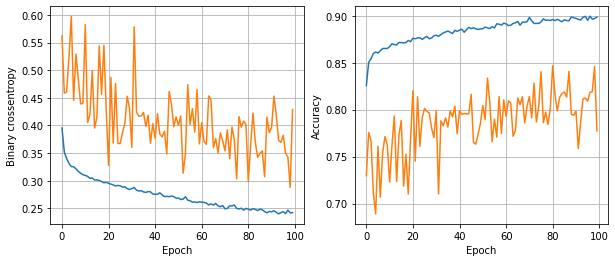

119/119 [==============================] - 0s 3ms/step - loss: 0.3542 - accuracy: 0.8638

32 nodes, dropout 0, learning rate 0.01, batch size 128


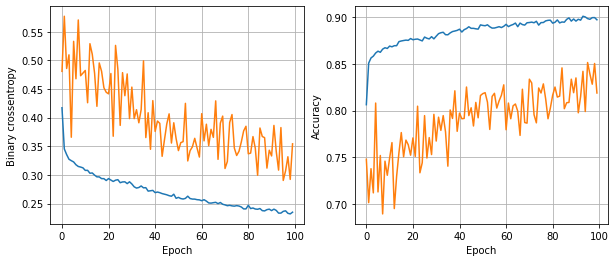

119/119 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8683

32 nodes, dropout 0, learning rate 0.005, batch size 32


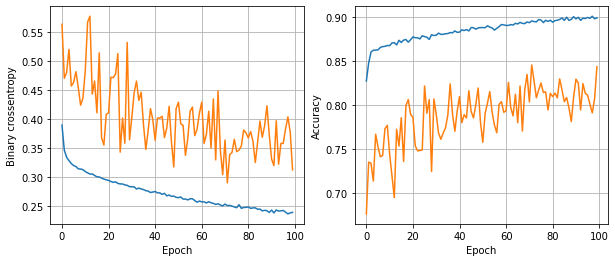

119/119 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8678

32 nodes, dropout 0, learning rate 0.005, batch size 64


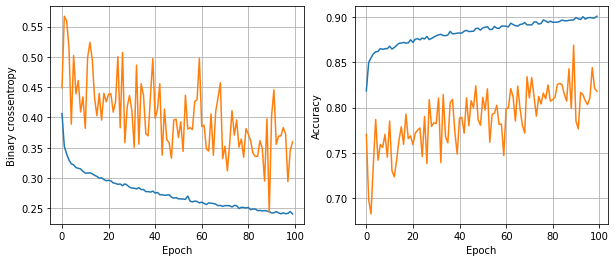

119/119 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8657

32 nodes, dropout 0, learning rate 0.005, batch size 128


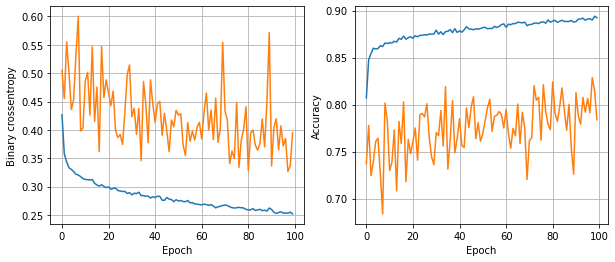

119/119 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8770

32 nodes, dropout 0, learning rate 0.001, batch size 32


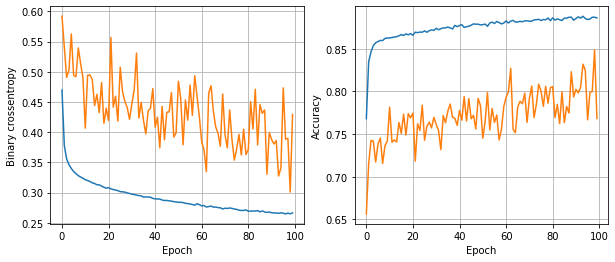

119/119 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.8820

32 nodes, dropout 0, learning rate 0.001, batch size 64


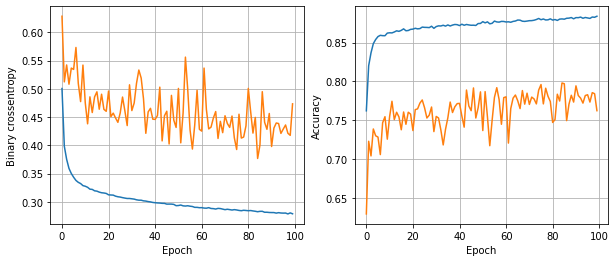

119/119 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8717

32 nodes, dropout 0, learning rate 0.001, batch size 128


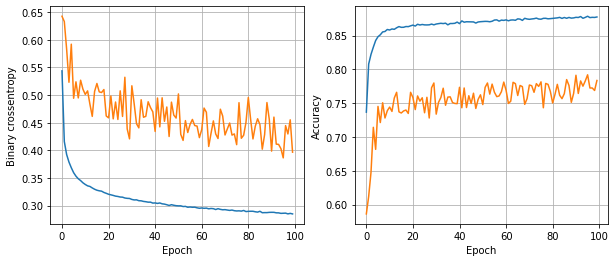

119/119 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.8799

32 nodes, dropout 0.2, learning rate 0.01, batch size 32


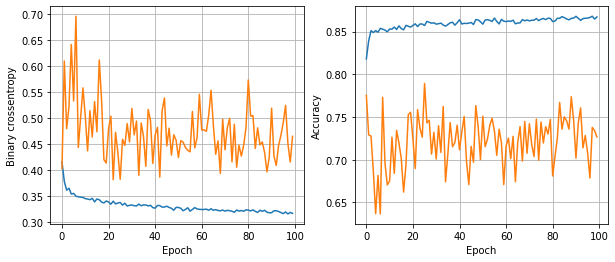

119/119 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8772

32 nodes, dropout 0.2, learning rate 0.01, batch size 64


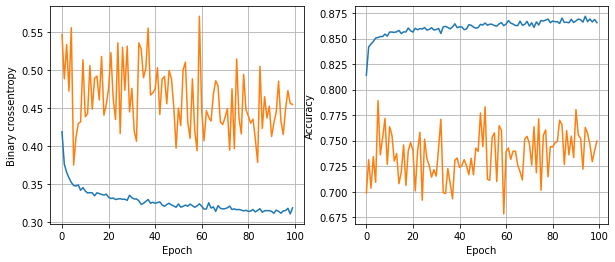

119/119 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.8772

32 nodes, dropout 0.2, learning rate 0.01, batch size 128


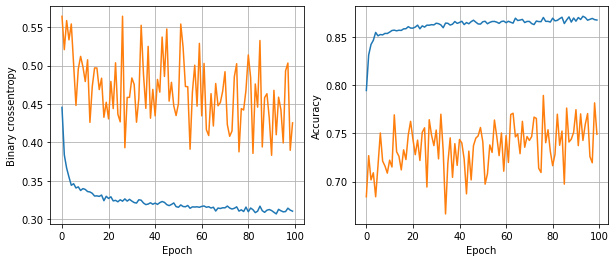

119/119 [==============================] - 0s 3ms/step - loss: 0.2900 - accuracy: 0.8812

32 nodes, dropout 0.2, learning rate 0.005, batch size 32


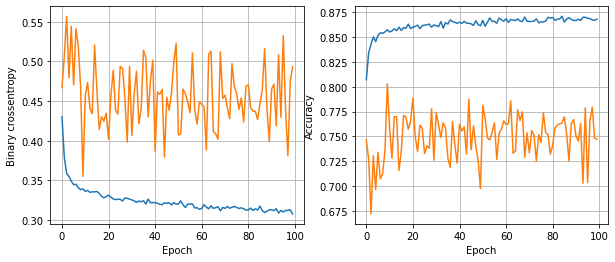

119/119 [==============================] - 0s 2ms/step - loss: 0.2920 - accuracy: 0.8799

32 nodes, dropout 0.2, learning rate 0.005, batch size 64


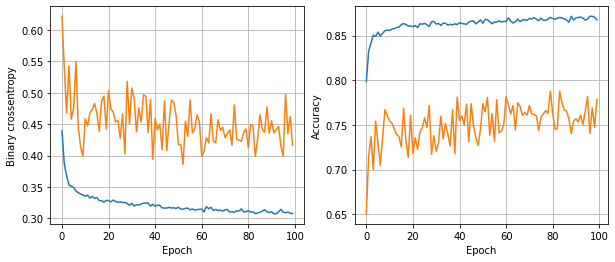

119/119 [==============================] - 0s 3ms/step - loss: 0.2872 - accuracy: 0.8796

32 nodes, dropout 0.2, learning rate 0.005, batch size 128


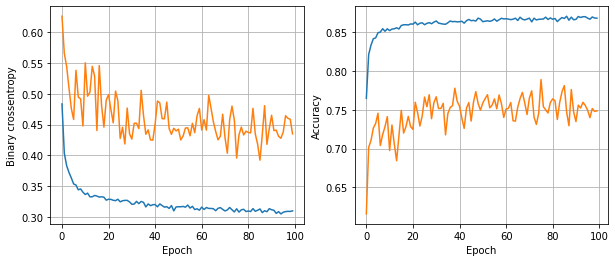

119/119 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8809

32 nodes, dropout 0.2, learning rate 0.001, batch size 32


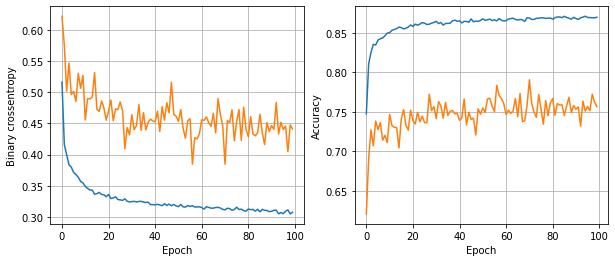

119/119 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.8791

32 nodes, dropout 0.2, learning rate 0.001, batch size 64


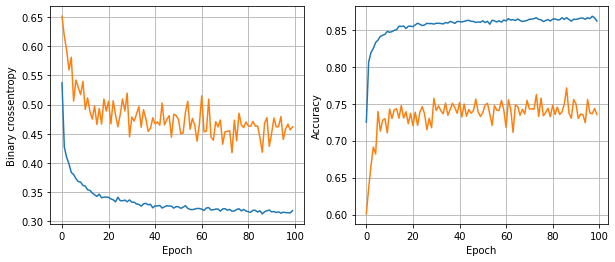

119/119 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.8822

32 nodes, dropout 0.2, learning rate 0.001, batch size 128


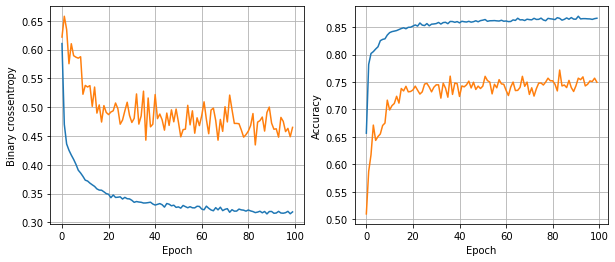

119/119 [==============================] - 0s 2ms/step - loss: 0.2924 - accuracy: 0.8783



 67%|██████▋   | 2/3 [41:45<21:03, 1263.09s/it]


64 nodes, dropout 0, learning rate 0.01, batch size 32


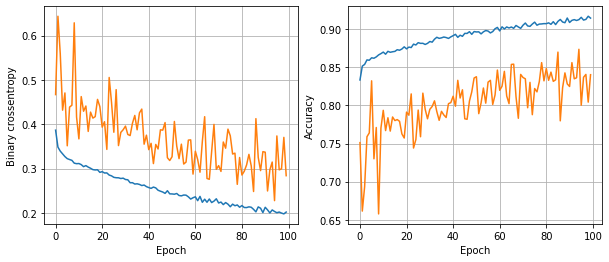

119/119 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8599

64 nodes, dropout 0, learning rate 0.01, batch size 64


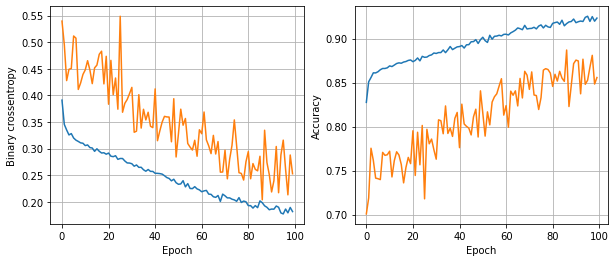

119/119 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.8538

64 nodes, dropout 0, learning rate 0.01, batch size 128


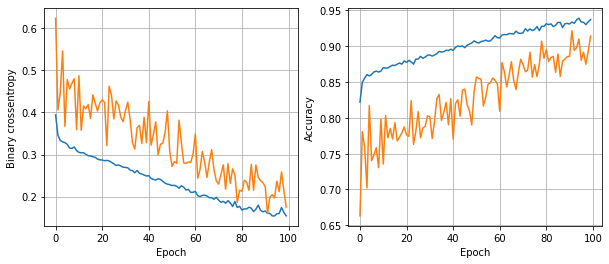

119/119 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.8575

64 nodes, dropout 0, learning rate 0.005, batch size 32


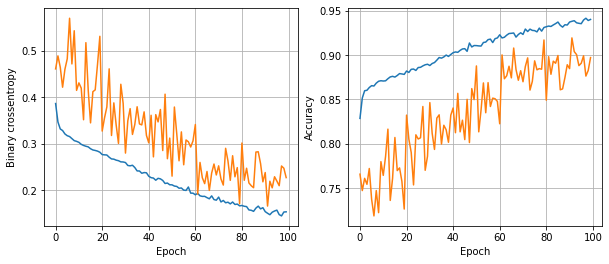

119/119 [==============================] - 1s 4ms/step - loss: 0.5551 - accuracy: 0.8552

64 nodes, dropout 0, learning rate 0.005, batch size 64


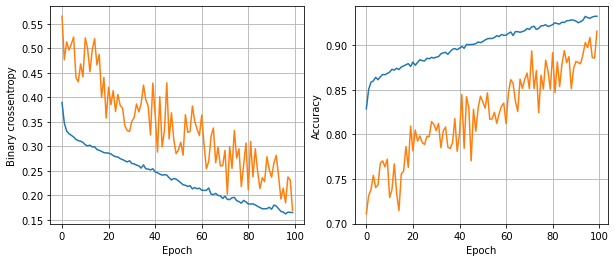

119/119 [==============================] - 1s 4ms/step - loss: 0.4623 - accuracy: 0.8454

64 nodes, dropout 0, learning rate 0.005, batch size 128


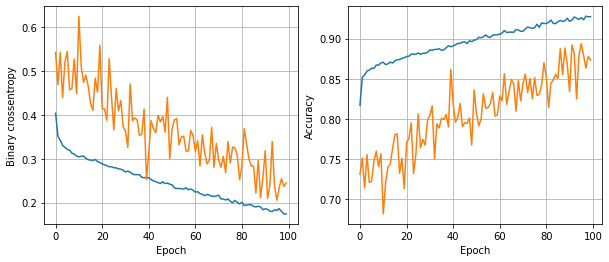

119/119 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.8691

64 nodes, dropout 0, learning rate 0.001, batch size 32


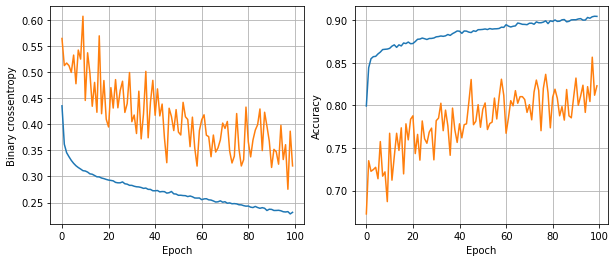

119/119 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8688

64 nodes, dropout 0, learning rate 0.001, batch size 64


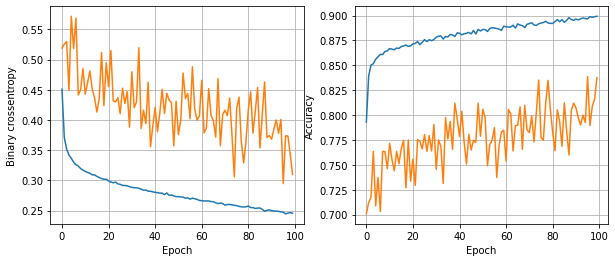

119/119 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8688

64 nodes, dropout 0, learning rate 0.001, batch size 128


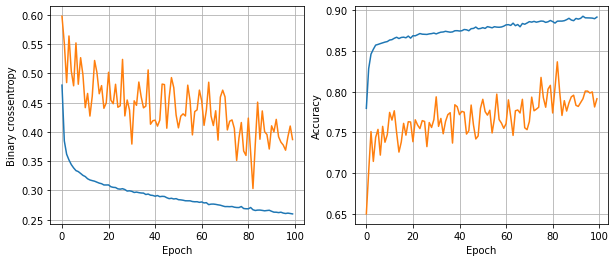

119/119 [==============================] - 0s 3ms/step - loss: 0.2980 - accuracy: 0.8743

64 nodes, dropout 0.2, learning rate 0.01, batch size 32


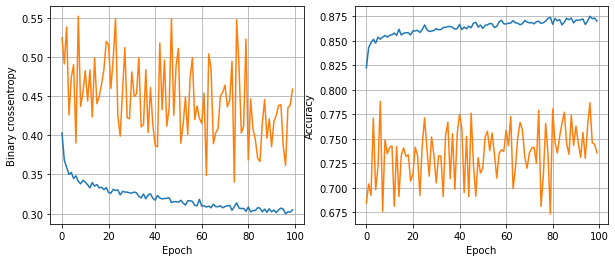

119/119 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8746

64 nodes, dropout 0.2, learning rate 0.01, batch size 64


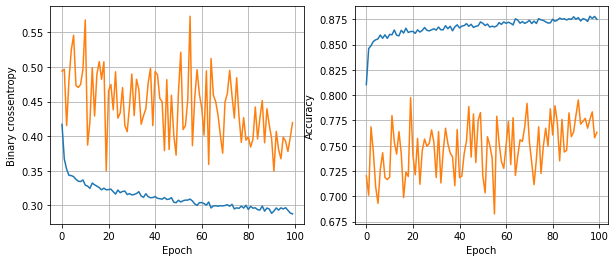

119/119 [==============================] - 1s 5ms/step - loss: 0.2848 - accuracy: 0.8825

64 nodes, dropout 0.2, learning rate 0.01, batch size 128


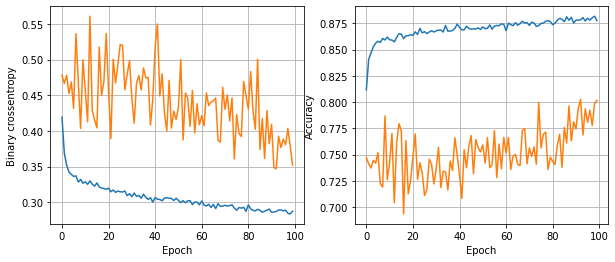

119/119 [==============================] - 0s 3ms/step - loss: 0.2874 - accuracy: 0.8820

64 nodes, dropout 0.2, learning rate 0.005, batch size 32


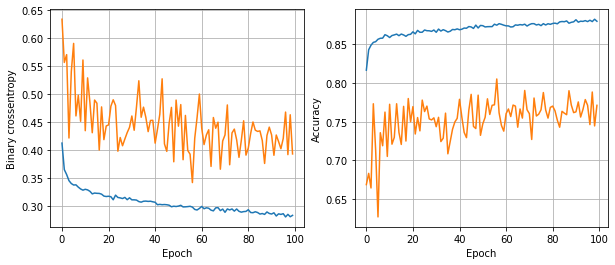

119/119 [==============================] - 0s 3ms/step - loss: 0.2911 - accuracy: 0.8812

64 nodes, dropout 0.2, learning rate 0.005, batch size 64


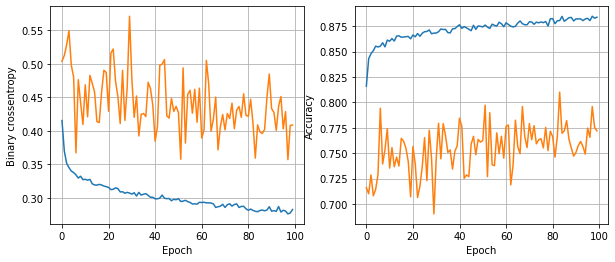

119/119 [==============================] - 0s 2ms/step - loss: 0.2775 - accuracy: 0.8856

64 nodes, dropout 0.2, learning rate 0.005, batch size 128


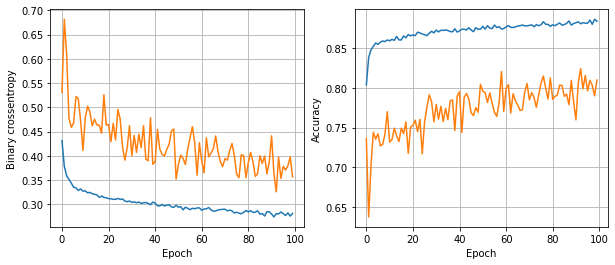

119/119 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8796

64 nodes, dropout 0.2, learning rate 0.001, batch size 32


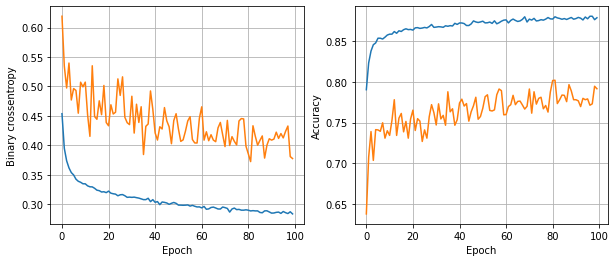

119/119 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8772

64 nodes, dropout 0.2, learning rate 0.001, batch size 64


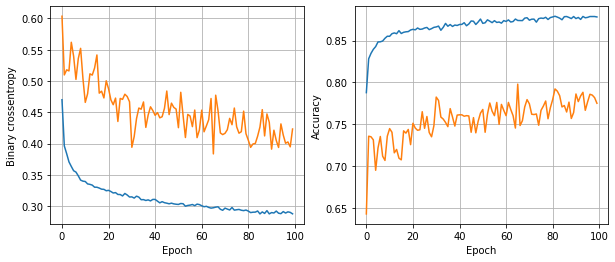

119/119 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.8851

64 nodes, dropout 0.2, learning rate 0.001, batch size 128


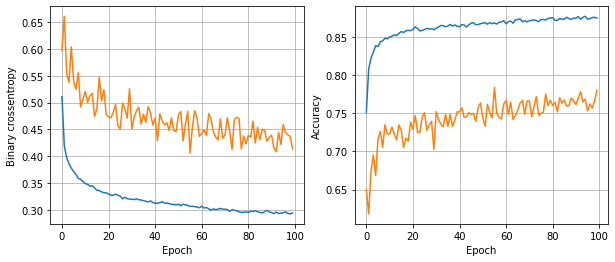

119/119 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.8807



100%|██████████| 3/3 [1:07:13<00:00, 1344.57s/it]


In [33]:
least_val_loss = float('inf')
least_loss_model = float()
least_loss_model = None
epochs = 100
for num_nodes in tqdm((16, 32, 64)):
  for dropout_prob in (0, 0.2):
    for lr in (0.01, 0.005, 0.001):
      for batch_size in (32, 64, 128):
        print(f"\n{num_nodes} nodes, dropout {dropout_prob}, learning rate {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)
        # print(val_loss)
        # print(model.metrics_names)
        if val_loss[0] < least_val_loss:
          least_val_loss = val_loss[0]
          least_loss_model = model